## 1. Exploratory Data Analysis 

In this coursework I will be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#Prints more description for the data visualization
# print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

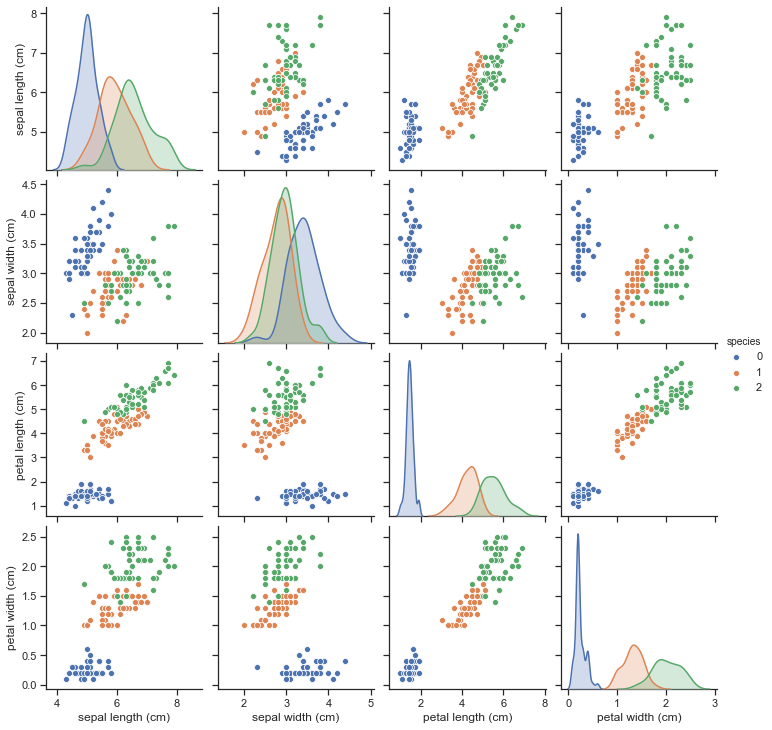

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
def myplotGrid(X,y):
    '''
    Plots the grid for the Wine dataset
    Takes:
    :param X: This is the training data
    :param y: This is the label
    Returns:
    Nothing
    '''
    # Split data by class
    dataPerClass=[]
    for i in range(0,3):
        x = [X[j] for j in range(0,len(X)) if y[j]==i]
        dataPerClass.append(np.array(x))
        
    #get Number of column in grid
    num_Col = X.shape[1]
    #Create axis and plot Grid
    fig,ax = plt.subplots(num_Col,num_Col,figsize=(12,12))
    fig.suptitle("Interaction between selected features")
    
    #Nested for loop for plot whole grid
    for i in range(0,4):
        for j in range(0,4):
            # loop over the three classes
            for l, d in enumerate(dataPerClass):
                #Plot Hist diagonaly across
                if i == j:
                    # Colormap for the Histogram
                    colors = [
                    plt.cm.get_cmap('Paired')(1),
                    plt.cm.get_cmap('Paired')(7),
                    plt.cm.get_cmap('Paired')(3)
                    ]
                    # For diagonal cases, plot histogram:
                    ax[i,j].hist([X[y==0, j], X[y==1, j], X[y==2, j]], color=colors)
                    ax[i,j].set_title(selected_features[i])
                else:
                    #Plot Scatter plot 
                    ax[i,j].scatter(d[:,i],d[:,j],label = wine.target_names[l], cmap=plt.cm.Set2)
                    ax[i,j].set_title(selected_features[i]+ " vs " +selected_features[j])

C:\Users\shenf\AppData\Local\Temp\ipykernel_17792\350825717.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i,j].scatter(d[:,i],d[:,j],label = wine.target_names[l], cmap=plt.cm.Set2)


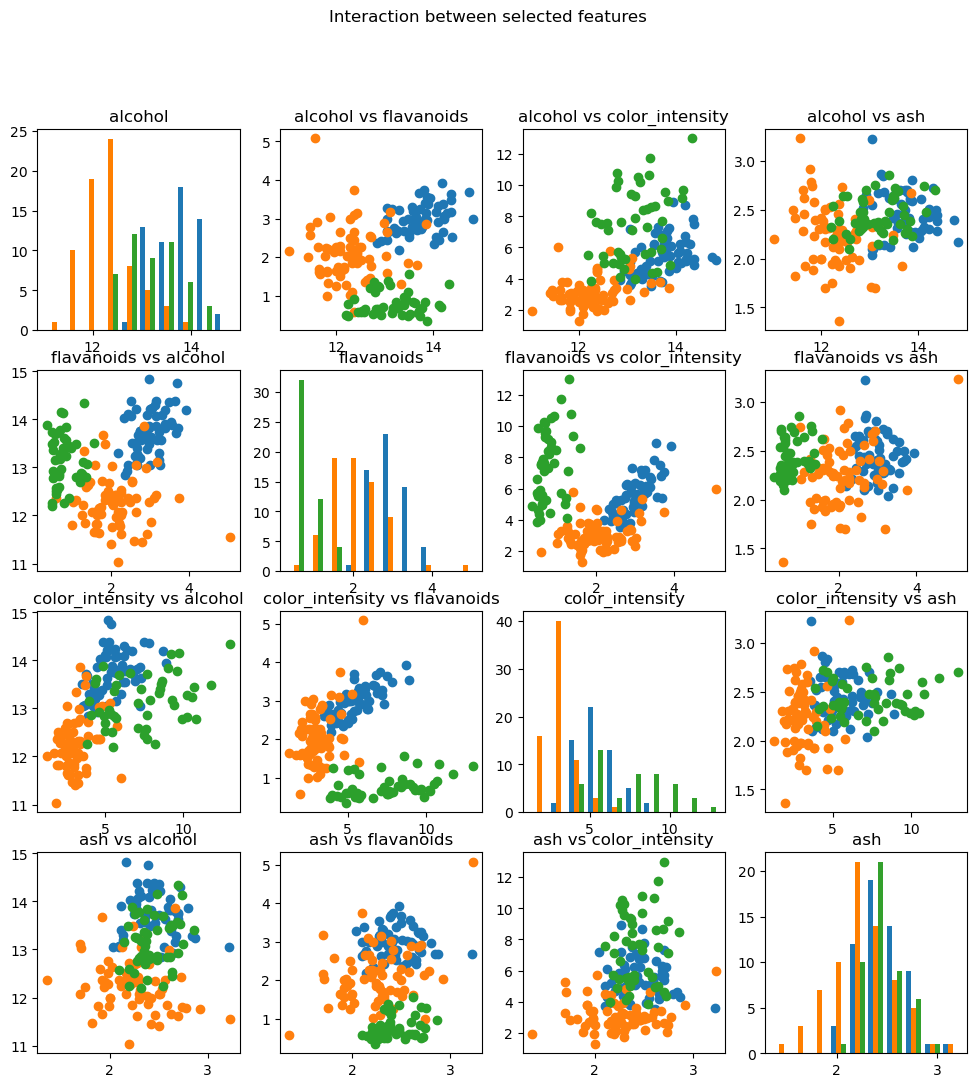

In [3]:
# run the plotting function
# Visualize the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

C:\Users\shenf\AppData\Local\Temp\ipykernel_17792\350825717.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i,j].scatter(d[:,i],d[:,j],label = wine.target_names[l], cmap=plt.cm.Set2)


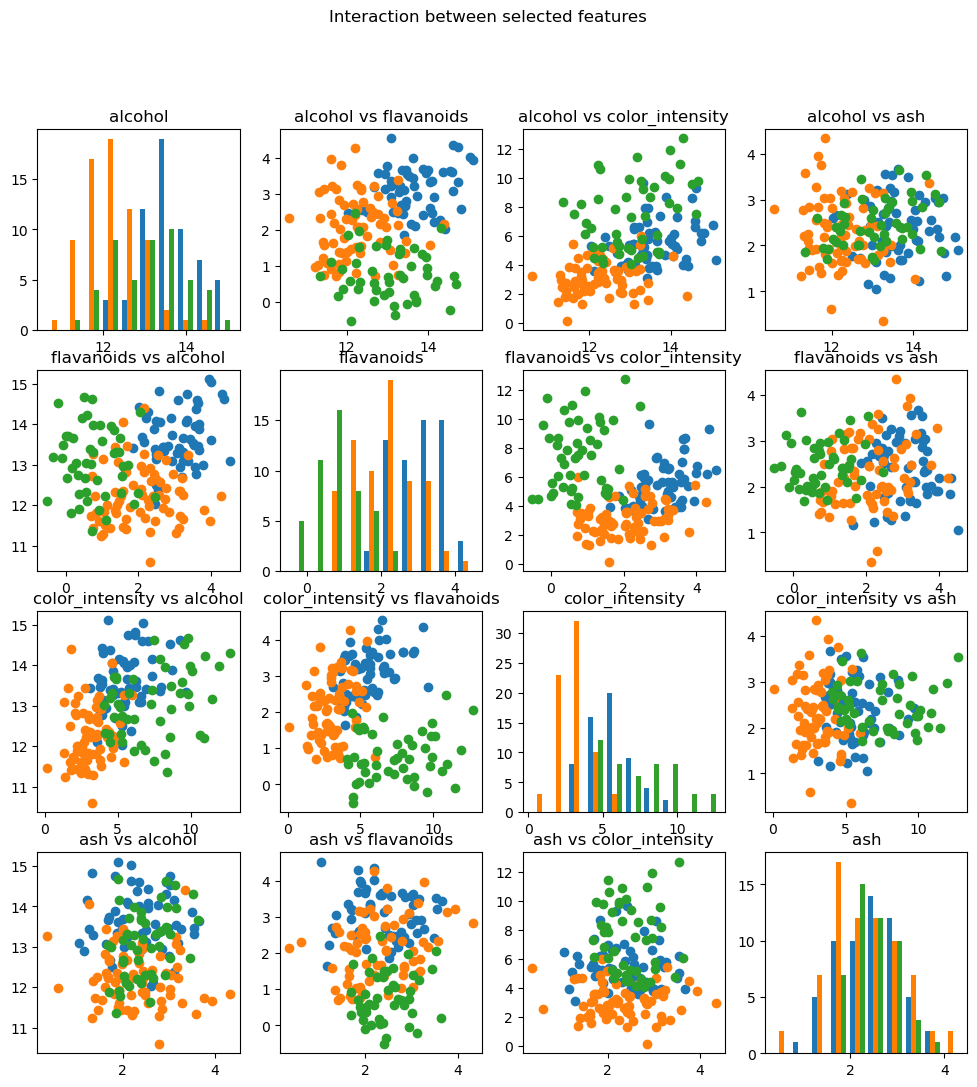

In [4]:
# noise code
mySeed = 12345
np.random.seed(mySeed)
XN = X+np.random.normal(0,0.6,X.shape)
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


Answer:
In order to determine which features to use for building a classifier, I have to select 2 that have the greatest impact on the target class. Using the ``myplotGrid`` function above, I can deduce the correlation of variables across the 3 classes. The histogram shows how features perform across each class, based on that the 'color_intensity' is not a good fit as it does not have a normal distribution of data. Its peak is off center and the tail stretches away from it, this means that the data is not accurate. Scatter plots are another indicator of relation as we can use line of best fit method to determine the best fit of features. When the x-values increase the y-values tend to increase also, this shows a positive association of the feature on the target class which elimates 'ash' since the data point of all classes clustter into a group making it difficult to determine if the line is positive or negative. By utilizing the two methods, I believe that the features **[alcohol ,flavanoids]** are good fits, as they both display a positive association in relation to the target class and does not have a skewed distribution.

Based on the analysis above,it helps me to summarize the main characteristics of the selected features which highly correlate with the target.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


Answer:
Based on the scatter plot above, the points are clearly separated and well-defined without noise. The plot shows a clear boundary between the different classes.

But when the data is added with Gaussian noise, the points becomes more scattered and overlaps with each other. The boundary between the different classes are less clear and more ambiguous as compared to the plot without noise. The added noise may make it more difficult to accurately classify the points based on their features.

From this analysis, I can conclude that it is important to consider the effect of noise on the data when building and evaluating machine learning models. Noise can make it more challenging for the model to generalize to new data and may degrade the performance of the model. In some cases, it may be necessary to apply techniques such as feature selection or dimensionality reduction to reduce the impact of noise on the model.

## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code
import math,random
import numpy as np
from collections import Counter
#Get Euclidean distance in n-space
def euclidean_dist(a, b):
    '''
    Calculate the SHORTEST distance between two rows in a dataset
    Takes:
    :param a: Point A
    :param b: Point B
    Return:
    dist
    '''
    # calculating Euclidean distance using linalg.norm()
    #Formula taken from W3schools.com
    dist = np.linalg.norm(a - b, axis = 0)
    return dist

#Get the Manhattan distance between two-dimenstional vectors
def manhattan_dist(a,b):
    '''
    Calculates sum of absolute differences of two coordinates
    Takes:
    :param a: Point A
    :param b: Point b
    Return:
    distance
    '''
    #Manhattan Distance formula
    #Formula Taken from https://datagy.io/
    distance = 0
    for x1,x2 in zip(a,b):
        distance += abs(x1-x2)
    return distance

#Create train-test split procedure for evaluation
def train_test_split(X, y, test_size):
    '''
    Splits inputs and outputs into ratios
    Take:
    :param X: X
    :param y: y
    :param test_size: Test size must be between 0 - 1
    Return:
    X_train,
    X_test,
    y_train,
    y_test
    '''
    # create a permutation of the indices
    indices = np.random.permutation(X.shape[0])
    # calculate the number of samples in the test set
    test_samples = int(X.shape[0] * test_size)
    # get the indices for the training and testing sets
    X_train, X_test = X[indices[test_samples:]], X[indices[:test_samples]]
    y_train, y_test = y[indices[test_samples:]], y[indices[:test_samples]]
    return (X_train,X_test,y_train,y_test)

def getAccuracy(y_test,predictions):
    """
    Evaluates accuracy of the knn_predictions. Returns a value between 0 and 100%.
    Input:
    yTest 
    predictions
    Output:
    accuracy = Rounded off to 2.d.p
    """
    acc = np.sum(predictions == y_test)/len(y_test)
    # * 100 and Rounded off to 2.d.p
    return np.round(acc*100,2)

In [6]:
#mykNN code
def mykNN(X_train,y_train,X_test,k,dist_type):
    '''
    Makes prediction value based on inputs 
    Takes:
    :param X_train: X training inputs
    :param y_train: y training outputs
    :param X_test: X test inputs
    :param k: k= number of neighbours
    :param dist_type: 'euclidean' or 'manhattan' distance
    Returns:
    List of predicted values for test inputs
    '''
    predicted = []
    #Fit and predict
    for x in X_test:
        neighbours =[[],[]]
        #Get all distances 'euclidean' or 'manhattan'
        if dist_type == "euclidean":
            distance = [euclidean_dist(x,j) for j in X_train]
        elif dist_type =="manhattan":
            distance = [manhattan_dist(x,j) for j in X_train]
        else:
            raise ValueError("Invalid distance type")
        # get the indices of the k nearest neighbors
        k_indices = np.argpartition(distance, k)[:k]
        # get the labels of the k nearest neighbors
        k_labels = y_train[k_indices]
        # get the most common label among the k nearest neighbors
        predicted.append(np.argmax(np.bincount(k_labels)))
        
    return np.array(predicted)


#Split 20% for testing, 80% for training
X_train,X_test,y_train,y_test = train_test_split(X,y,0.2)
#Get kNN predicted values, k = 10 , distance = euclidean
y_ = mykNN(X_train,y_train,X_test,10,"euclidean")
print("Predicted Values:")
print(y_)
print("True Values:")
print(y_test)
accuracy = getAccuracy(y_test,y_)
print("Accuracy :", accuracy ,"%" )

# Testing against scikits learn Knn imports:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
# knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean')
# knn.fit(X_train,y_train)
# y_pred=knn.predict(X_test)
# getAccuracy(y_test, y_pred)
##### Accuracy : 97.22% #######

Predicted Values:
[2 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 2]
True Values:
[2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2]
Accuracy : 94.29 %


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [7]:
# confusion matrix, accuracy, precision, recall, etc. 
import numpy as np
#Confusion matrix
def confusion_matrix(y_test, y_):
    '''
    Compute confusion matrix from ground truth and prediction values
    Takes:
    :param y_test: True values 
    :param y_: predicted values
    Returns:
    matrix
    '''
    matrix = {}
    # extract the different classes
    classes = np.unique(y_test)
    # initialize the confusion matrix
    matrix = np.zeros((len(classes), len(classes)))
    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):
           # count the number of classes in each combination
           matrix[i, j] = np.sum((y_test == classes[i]) & (y_ == classes[j]))
    return matrix
    
#Evaluate accuracy of the matrix
def Accuracy_score(y_test,y_):
    '''
    Calculate the accuracy score of the model
    Takes:
    :param y_test: True values 
    :param y_: predicted values
    Returns:
    Accuracy value in 2 decimal
    '''
    #(True Positive + True Negative) / Total Predictions
    #np.where(condition)returns element where the given condition is satisfied.
    accuracy= len(y_test[np.where(y_test==y_)])/len(y_)
    return np.round(accuracy*100,2)

#Get the precision of the model
def Precision(y_test,y_):
    '''
    Precision is the correct predictions value to the total predicted.
    Takes:
    :param y_test: True values 
    :param y_: predicted values
    Returns:
    precision value per class
    '''
    precision = []
    # Get array of classes
    classes=np.unique(y_)
    # Get total no. of classes
    n=len(classes)
    # get confusion matrix
    con_matrix = confusion_matrix(y_test,y_)
    for i in range(0,n):
        #(True Positive + False Positive)
        sum_value = sum([row[i] for row in con_matrix]) 
        #True Positive / (True Positive + False Positive)
        #eg. Precision for class 0 
        # 10/10+1+1 column 
        true_positive = np.max(con_matrix[i], axis=0)
        precisionPerClass = true_positive / sum_value
        precision.append(precisionPerClass)
    return precision

#Get Recall/Sensitive value of the model per class
def Recall(y_test,y_):
    '''
    Recall calculates out of total positive, 
    what percentage are predicted positive
    Takes:
    :param y_test: True values 
    :param y_: predicted values
    Returns:
    recall score per class
    '''
    recall = []
    # Get array of classes
    classes=np.unique(y_)
    # Get total no. of classes
    n=len(classes)
    # get confusion matrix
    con_matrix = confusion_matrix(y_test,y_)

    for i in range(0,n):
        #(True Positive + False Negative)
        sum_value = sum(con_matrix[i])
        #True Positive / (True Positive + False Negative)
        #eg. Recall for class 1 
        # 13/13+1+0 horizontal row
        true_positive = np.max(con_matrix[i], axis=0)
        recallPerClass = true_positive / sum_value
        recall.append(recallPerClass)
    return recall

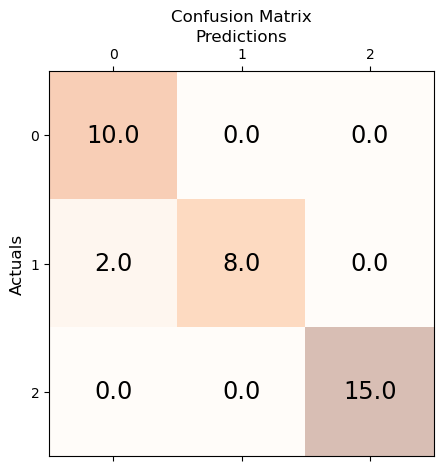

This is the Model Accuracy:  94.29
This is the precision of model per class:  [0.8333333333333334, 1.0, 1.0]
This is the recall score of model per class:  [1.0, 0.8, 1.0]
The sklearn library version's Accuracy Score is:  94.29

               precision    recall  f1-score   support

     class_0       0.83      1.00      0.91        10
     class_1       1.00      0.80      0.89        10
     class_2       1.00      1.00      1.00        15

    accuracy                           0.94        35
   macro avg       0.94      0.93      0.93        35
weighted avg       0.95      0.94      0.94        35



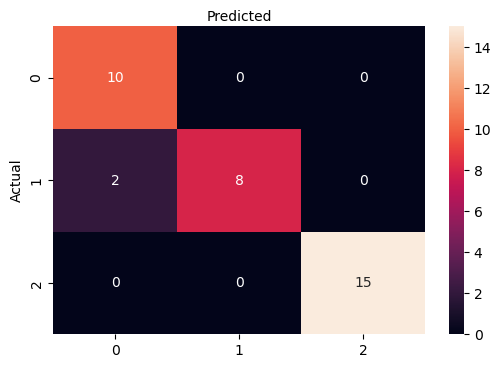

In [8]:
# test evaluation code
# PLOT the confusion matrix using Matplotlib
matrix = confusion_matrix(y_test, y_)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
#Title and Labels
plt.xlabel('Predictions', fontsize=12)
ax.xaxis.set_label_position('top')
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

print("This is the Model Accuracy: " ,Accuracy_score(y_test,y_))
print("This is the precision of model per class: ",Precision(y_test,y_))
print("This is the recall score of model per class: ",Recall(y_test,y_))


######## sklearn library for comparison purposes ######
# importing seaborn,sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##### Plot confusion matrix #####
f, ax = plt.subplots(figsize=(6, 4))
# actual and predicted values
cm = confusion_matrix(y_test, y_)
# If True, write the data value in each cell
sns.heatmap(cm,annot=True)
ax.set_xlabel("Predicted")
ax.xaxis.set_label_position('top')
ax.set_ylabel("Actual")
# Get accuracy
print("The sklearn library version's Accuracy Score is: ",np.round(accuracy_score(y_test, y_)*100,2))
#Get precision and recall scores
print("\n" , classification_report(y_test,y_,target_names = wine.target_names))


## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [9]:
# myNestedCrossVal code
def myNestedCrossVal(X,y,kfold,nns,dists,mySeed):
    '''
    Nested cross validation of KNN
    Takes:
    :params X:  data matrix
    :params y: output labels
    :params kfold: Number of folds
    :params nns: Range of neigbours
    :params dists: distance type "euclidean" and "manhattan"
    :params mySeed: random Seed
    Return:
    Accuracy List
    Confusion matrix
    '''
    #Based on the lab 4.401 in Coursera to create k-fold nested CrossVal
    # Creates an array of random permutation of indices
    np.random.seed(mySeed)
    accuracy_fold=[] #list to store accuracies folds
    parameters_fold=[]#list to store parameter folds
    conf_matrices = []#List to store confusion matrix
    

    #To generate a list of shuffled indices from in the range (0,number of data)
    L=list(range(X.shape[0]))
    indices=np.random.permutation(L)
    #Use the function array_split to split the indices to k different bins:
    bins = np.array_split(indices, kfold)
    #loop through outer folds
    for i in range(0,kfold):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing
        foldVal =[] #list to save indices for validation
        #loop through all bins, 
        #take bin i for testing, next bin for validation,the rest for training
        valBin=(i+1)%kfold
        for j in range(0,len(bins)):
            if(i==j):
                foldTest=bins[i]
            elif(j==valBin):
                foldVal=bins[valBin]
            else:
                foldTrain.extend(bins[j])
        #Save Best Distance
        bestDistance = ''
        #Save best no. of nearest neighbour
        bestNN = -1 
        #Save best Accuracy
        bestAccuracy = -10
        #nested for loop thru all parameters (one for distance, one for nn)
        for d in dists:
            for nn in nns:
                #Split train and test
                #Define knn with 5 neighbour(nn), and euclidean distance(d)
                #Based on new Train,and Val fold
                y_pred = mykNN(X[foldTrain],y[foldTrain],X[foldVal],nn,d)
                accuracy = Accuracy_score(y[foldVal],y_pred)
                if accuracy > bestAccuracy:
                    bestDistance = d
                    bestNN = nn
                    bestAccuracy = accuracy
        #Evaluate on test data
        #Extend Training set with validation set
        foldTrain.extend(foldVal)
        #knn on fold
        y_ = mykNN(X[foldTrain],y[foldTrain],X[foldTest],bestNN,bestDistance)
        #Calculate accuracy of fold and append to array
        accuracy_ =Accuracy_score(y[foldTest],y_)
        accuracy_fold.append(accuracy)
        # store parameters
        parameters_fold.append((bestDistance,bestNN))
        #get and store confusion matrix
        conf_matrix = confusion_matrix(y[foldTest],y_)
        conf_matrices.append(conf_matrix)
        
    return accuracy_fold,parameters_fold,np.array(conf_matrices)

In [10]:
# evaluate clean data code
######### CLEAN #############
#Implement Cross-validation knn on clean data
dists = ["euclidean","manhattan"]
kFolds = 5
mySeed = 12345
#Perform nest cross-validation
accuracies_fold,best_parameters_fold,conf_matrices = myNestedCrossVal(X,y,kFolds,list(range(1,11)),dists,mySeed)
#Calucalate Average accuracy
avg_accuracy = np.average(accuracies_fold)
#Standard Deviation
std_accuracy = np.std(accuracies_fold)

#Import Pandas
import pandas 
# Create Table for clean data
columns=(["accuracy","k","distance"])
rounded_accuracies=["{0:.2f}".format(i)for i in accuracies_fold]
dist_metrics=[best_parameters_fold[i][0]for i in range(0,len(best_parameters_fold))]
nns=[best_parameters_fold[i][1]for i in range(0,len(best_parameters_fold))]
data=np.array([rounded_accuracies,nns,dist_metrics])
df=pandas.DataFrame(data.T,np.arange(1,kFolds+1),columns,)
df

,accuracy,k,distance
1,91.67,3,euclidean
2,88.89,1,euclidean
3,88.57,1,euclidean
4,97.14,5,euclidean
5,97.22,1,euclidean


In [11]:
# evaluate noisy  data code
############# NOISY #################
# Implement nested cross-validation knn on noisy data
# use XN instead of X
Naccuracies_fold,Nbest_parameters_fold,Nconf_matrices = myNestedCrossVal(XN,y,kFolds,list(range(1,11)),dists,mySeed)
#Calucalate Average accuracy
Noisy_avg_accuracy = np.average(Naccuracies_fold)
#Standard Deviation
Noisy_std_accuracy = np.std(Naccuracies_fold)

# Create Table for NOISY data
columns=(["accuracy","k","distance"])
Nrounded_accuracies=["{0:.2f}".format(i)for i in Naccuracies_fold]
Ndist=[Nbest_parameters_fold[i][0]for i in range(0,len(Nbest_parameters_fold))]
Noisy_nns=[Nbest_parameters_fold[i][1]for i in range(0,len(Nbest_parameters_fold))]
Noisy_data=np.array([Nrounded_accuracies,Noisy_nns,Ndist])
Noisy_df=pandas.DataFrame(Noisy_data.T,np.arange(1,kFolds+1),columns,)
Noisy_df

,accuracy,k,distance
1,86.11,1,euclidean
2,86.11,5,euclidean
3,85.71,4,euclidean
4,97.14,10,manhattan
5,94.44,8,euclidean


In [12]:
# Print the summaries
print("Clean Data")
print("\nTotal average: %8.3f ± %8.3f"%(avg_accuracy,std_accuracy)) 
print("Noisey Data")
print("\nTotal average: %8.3f ± %8.3f"%(Noisy_avg_accuracy,Noisy_std_accuracy ))

Clean Data

Total average:   92.698 ±    3.815
Noisey Data

Total average:   89.902 ±    4.885


## 5. Summary of results

### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


CLEAN


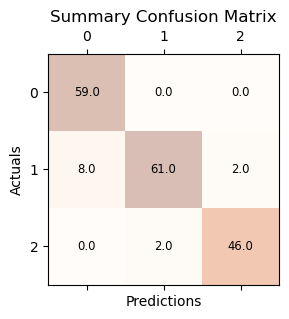

Class-relative precision for each class (0,1,2): [0.8805970149253731, 0.9682539682539683, 0.9583333333333334]
Class-relative recall for each class (0,1,2): [1.0, 0.8591549295774648, 0.9583333333333334]
Accuracy:    92.70
NOISY


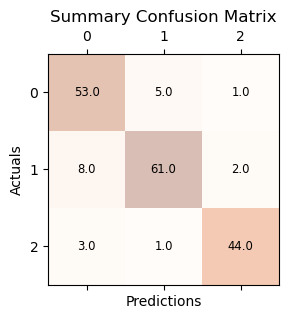

Class-relative precision for each class (0,1,2): [0.828125, 0.9104477611940298, 0.9361702127659575]
Class-relative recall for each class (0,1,2): [0.8983050847457628, 0.8591549295774648, 0.9166666666666666]
Accuracy:    89.90


In [13]:
#Get Precision metric from conf_matrix
def mx_Precision(conf_matrix):
    '''
    Get Class-relative Precision
    Takes:
    :param conf_matrix: Confusion matrix
    Returns:
    Precision value
    '''
    # create a list to store the precision values
    precisions = []
    # loop through the classes
    for i in range(len(conf_matrix)):
        # get the number of true positive predictions for the current class
        true_positives = conf_matrix[i][i]
        # get the total number of positive predictions for the current class
        positive_predictions = sum(conf_matrix[:, i])
        # calculate precision for the current class
        precision = true_positives / positive_predictions
        # append the precision value to the list
        precisions.append(precision)
    # return the list of precision values
    return precisions

#Get Recall value from conf_matrix
def mxRecall(conf_matrix):
    '''
    Get Class-relative Recall
    Takes:
    :param conf_matrix: Confusion matrix
    Returns:
    Recall value
    '''
    # create a list to store the recall values
    recalls = []
    # loop through the classes
    for i in range(len(conf_matrix)):
        # get the number of true positive predictions for the current class
        true_positives = conf_matrix[i][i]
        # get the total number of actual positive samples for the current class
        actual_positives = sum(conf_matrix[i, :])
        # calculate recall for the current class
        recall = true_positives / actual_positives
        # append the recall value to the list
        recalls.append(recall)
    # return the list of recall values
    return recalls

#Create a summary matrix from all the classes
def summary_matrices(conf_matrices):
    '''
    Prints the summary of confusion matrices
    Takes:
    :param conf_matrices: Confusion matrices from
    myNestedCrossVal
    Return:
    Print parameters for each class 
    '''
    #for loop to go thru matrices
    conf=np.zeros(conf_matrices[0].shape)
    for c in conf_matrices:
        conf=np.add(conf,c)
        
    # Plot matrix with labels using previous answer as model
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(conf, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf.shape[0]):
        for j in range(conf.shape[1]):
            ax.text(x=j, y=i,s=conf[i, j], va='center', ha='center', size='small')
    #Title and Labels
    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Summary Confusion Matrix', fontsize=12)
    plt.show()
    # Print Parameters using the above 2 functions 
    precision=mx_Precision(conf)
    print("Class-relative precision for each class (0,1,2): %s" %precision)
    recall=mxRecall(conf)
    print("Class-relative recall for each class (0,1,2): %s" %recall)
    
print('CLEAN')
# clean data summary results
#Use clean data and run summary_matrices function
summary_matrices(conf_matrices)
#Print average Accuracy as well 
print("Accuracy: %8.2f"%avg_accuracy)
print('NOISY')
# clean data summary results
summary_matrices(Nconf_matrices)
print("Accuracy: %8.2f"%Noisy_avg_accuracy)

### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: The parameters starts to vary when noise is introduced into the model. It is not ideal to say that one parameter choice is always better than the other, as the optimal parameter values depends on the characteristics of the data. Different datasets and tasks may require different parameter values to achieve optimal performance.

Therefore, it is important to evaluate the performance of a model using  cross-validation techniques and to select the best parameter value based on the dataset provided.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

I would take the class of the closest value:

In [14]:
neighbours=[()]
if len(neighbours)==2 and neighbours.unique()==2:
    # In mykNN implementation the first in the sorted neighbours array would be the closest.
    outclass=neighbours[0]

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:
When running k-nn algorithm on a new dataset, there are several factors that should take into consideration:
   
   1. **Data preprocessing -** First, ensure that the new dataset is in the correct format for my k-nn algorithm.This may involve cleaning the data, imputing missing values, scaling the features, or performing other preprocessing steps.
   
   2. **Feature Extraction -** Next step would be to carefully select the features that will be used as input to the k-nn algorithm.Optimally, it is best to select only a subset of features as it would help to greatly reduce the time complexity of the algorithm. Since it does not have to calculate every single feature of the dataset.
   
   3. **Parameter Selection -** It is also important to select the value of the hyperparameter k. These are important input values for the algorithm to work. These include the distance metric ``dist_type``; "euclidean" or "manhattan" values, X and Y Train values, X test values as well as the number of nearest neighbors ``k`` .
   
   4.**Evaluation metrics -** The last step that i would take is choose appropriate evaluation metrics to assess the performance of my k-nn algorithm on the new dataset. My model may give satisfying results when evaluated using ``getAccuracy`` but may give poor results when evaluated against other metrics such as Confusion Matrix. Therefore, it is always wise to train and test on the new algorithm when implementing new data.